# Jelly Beans Linked to  Acne? an xkcd Simulation
This notebook provides a simulation to accompany the wise and funny xkcd comic about p-hacking: https://xkcd.com/882/ 
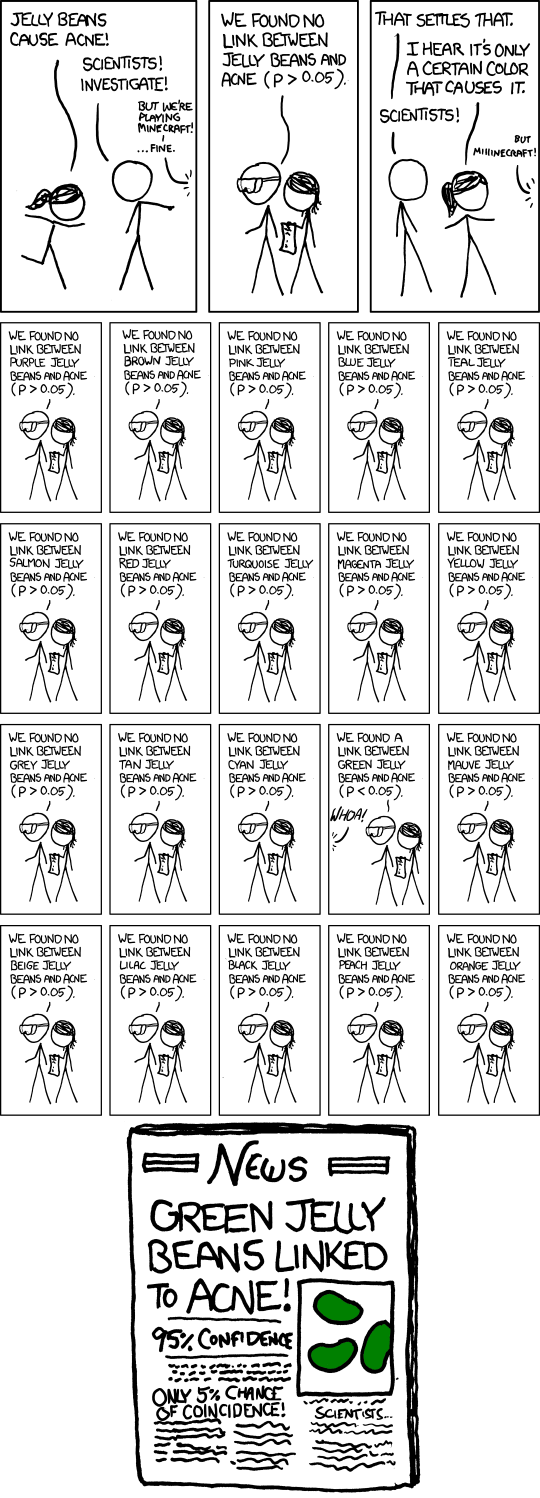

I'm using numpy, scipy, and pandas here because it makes everything a lot easier. Even if you don't know them, I think you'll be able to follow this code

In [62]:
from pandas import Series, DataFrame, crosstab
from numpy.random import binomial
from scipy.stats import chisquare, chi2_contingency

# The Simulation Setup
Assume:
- each person has a 50% chance of getting acne
- 70% of the population eats jelly beans
- The two are independent; there is no correlation
- Each person has a favorite jelly bean color
    - independent of acne, 
    - and independent of whether they eat jelly beans (everyone has a favorite color; only some people eat jelly beans!)

In [94]:
# generate the simulated data; one row for each person
num_people = 1500
acne_rate = .5
jelly_bean_rate = .7
colors = ['purple', 'brown', 'pink', 'blue', 'teal', 'salmon', 'red', 'turquoise', 'magenta', 'yellow', 'grey', 'tan', 'cyan', 'green', 'mauve', 'beige', 'lilac', 'black', 'peach', 'orange']
num_colors = len(colors)

d = {'acne': binomial(1, acne_rate, num_people),
     'bean_eater': binomial(1, jelly_bean_rate, num_people),
     'color_pref': [colors[i % num_colors] for i in range(num_people)]}
data = DataFrame(data=d)
data.tail()

,acne,bean_eater,color_pref
1495,1,1,beige
1496,1,1,lilac
1497,0,0,black
1498,0,1,peach
1499,0,1,orange


In [95]:
crosstab(data['acne'], data['bean_eater'])

bean_eater,0,1
acne,,
0,206,536
1,227,531


### Check whether there is a statistically significant correlation overall
Use a chi-squared test for independence.
You might get unlucky and find that the correlation is signficant; try re-running the code above that creates the simulated dataset in that case.

In [96]:
chi_stat, p, df, contingency = chi2_contingency(crosstab(data['acne'], data['bean_eater']))
if p < .05:
    print("Consumption of jelly beans is correlated with acne with p-value {}".format(p))
else:
    print("Consumption of jelly beans is *not* reliably correlated with acne; p-value was {}".format(p))

Consumption of jelly beans is *not* reliably correlated with acne; p-value was 0.3807733633548289


### Check whether there's a significant correlation for any of the individual colors
You might get unlucky and not find any; try re-running the code
Sorry, I don't have a way to make sure it's green that comes out significant, in order to match the xkcd comic. When you go fishing for significant results when there's just random noise, you can't control which things you'll find that are significant!

In [98]:
for color in colors:
    this_color = data.loc[data['color_pref'] == color]
    chi_stat, p, df, contingency = chi2_contingency(crosstab(this_color['acne'], this_color['bean_eater']))
    if (p < .05):
        print(crosstab(this_color['acne'], this_color['bean_eater']))
        print()
        print("Consumption of {} jelly beans is correlated with acne with p-value {}".format(color, p))
#    print(p)
    

bean_eater   0   1
acne              
0           13  20
1            6  36

Consumption of beige jelly beans is correlated with acne with p-value 0.026806975498149935
